In [1]:
%load_ext autoreload
%autoreload 2

import import_ipynb
from scripts.dataAnalysis import *
import seaborn as sns

ModuleNotFoundError: No module named 'scripts'

In [4]:
from scripts.dataAnalysis import *

ModuleNotFoundError: No module named 'scripts'

# Part 1 Analysis - Author Interest Diversity

An overview of research questions and methodology can been found [here](https://docs.google.com/document/d/1yqZOhKRkG5Jdh2CCJZSHCE2q3n9kk4DZO-Sw0UBqJIo/edit#heading=h.vf3tmrk4vl9j).

## 1.1 How does interest diversity vary between subreddits?

*Variables*
- author subreddit count
- author comment entropy/blau/gini

*Visuals*
- Get median across subreddits for each time point
- Plot all descriptives for each measure
- Repeat for case study subreddits

- Identify a 'standard' month, plot histograms for each and show rank of case studies

*Findings*
- What is the general behaviours across subreddits?
- Do the political subreddits behaviours differently than average?

In [2]:
figsize = (12,9)

In [1]:
level = "subredditLevel"
subdf = pd.read_csv(outputPath(f"""{level}/fullDataset.gzip"""), compression='gzip', index_col=0)
subrank = pd.read_csv(outputPath(f"""{level}/ranks.gzip"""), compression='gzip', index_col=0)

NameError: name 'pd' is not defined

In [3]:
d = pd.concat(data)
d.shape
d.head()

aut_sub_count_min  aut_sub_count_max  aut_sub_count_mean  \
        subreddit                                                             
2015-11 AskReddit                  1              37056            8.596366   
        funny                      1              37056           12.826859   
        pics                       1              37056           13.611078   
        videos                     1              37056           13.814216   
        worldnews                  1              37056           14.579018   

                   aut_sub_count_std  aut_sub_count_25%  aut_sub_count_median  \
        subreddit                                                               
2015-11 AskReddit          51.116028                2.0                   5.0   
        funny              82.875781                4.0                   9.0   
        pics               85.031058                5.0                  10.0   
        videos             92.389744                5.0                  10.0   
        worldnews          97.295377                5.0                  11.0   

                   aut_sub_count_75%  aut_com_count_min  aut_com_count_max  \
        subreddit                                                            
2015-11 AskReddit               11.0                  1            3922685   
        funny                   17.0                  1            3922685   
        pics                    18.0                  1            3922685   
        videos                  18.0                  1            3922685   
        worldnews               19.0                  1            3922685   

                   aut_com_count_mean    ...     aut_insub_mean  \
        subreddit                        ...                      
2015-11 AskReddit           50.197689    ...           0.359764   
        funny               84.335949    ...           0.188581   
        pics                89.596113    ...           0.169833   
        videos              95.477569    ...           0.179559   
        worldnews          110.914311    ...           0.168095   

                   aut_insub_std  aut_insub_25%  aut_insub_median  \
        subreddit                                                   
2015-11 AskReddit       0.336944       0.085714          0.230769   
        funny           0.264350       0.032258          0.076923   
        pics            0.248415       0.028986          0.071429   
        videos          0.257326       0.028777          0.071429   
        worldnews       0.243007       0.027027          0.068966   

                   aut_insub_75%  author_count  comment_count    entropy  \
        subreddit                                                          
2015-11 AskReddit       0.500000        103892         103892  11.551107   
        funny           0.200000        102660         102660  11.539178   
        pics            0.181818        101799         101799  11.530756   
        videos          0.200000        100156         100156  11.514484   
        worldnews       0.187500         86642          86642  11.369540   

                   gini      blau  
        subreddit                  
2015-11 AskReddit   0.0  0.999990  
        funny       0.0  0.999990  
        pics        0.0  0.999990  
        videos      0.0  0.999990  
        worldnews   0.0  0.999988  

[5 rows x 47 columns]

In [4]:
median = {}
for date, df in data.items():
    median[date] = df.median()
    
result = pd.DataFrame(median).T
result.head()

,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02
aut_sub_count_min,1.000000,3.000000,1.000000,7.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,2.000000
aut_sub_count_max,37056.000000,56882.000000,28.000000,76646.000000,44181.000000,102.000000,34293.000000,40998.000000,40442.000000,93.000000,...,1015.000000,1969.000000,1198.000000,1168.000000,2909.000000,3786.00000,37830.00000,152.000000,72.000000,76.000000
aut_sub_count_mean,21.598440,222.702875,11.743932,25549.333333,193.461036,37.000000,115.000000,274.690909,155.248883,36.215385,...,55.000000,77.821993,65.000000,68.404573,113.670005,127.24106,23.38495,5.977755,33.613023,35.000000
aut_sub_count_std,496.955978,12.833874,6.649979,0.000000,4.437060,15.981939,9.416298,11.323525,481.378390,15.984355,...,15.292468,24.500000,20.597179,20.500000,25.694790,31.00000,406.27468,7.902862,8.462790,7.586538
aut_sub_count_25%,3.000000,7.000000,4.000000,80.000000,5.000000,4.000000,5.000000,6.000000,3.500000,4.500000,...,4.250000,4.000000,4.000000,4.000000,4.250000,4.50000,4.00000,1.000000,4.000000,4.000000


In [7]:
result = result.T
result.columns

Index(['aut_sub_count_min', 'aut_sub_count_max', 'aut_sub_count_mean',
       'aut_sub_count_std', 'aut_sub_count_25%', 'aut_sub_count_median',
       'aut_sub_count_75%', 'aut_com_count_min', 'aut_com_count_max',
       'aut_com_count_mean', 'aut_com_count_std', 'aut_com_count_25%',
       'aut_com_count_median', 'aut_com_count_75%', 'aut_com_entropy_min',
       'aut_com_entropy_max', 'aut_com_entropy_mean', 'aut_com_entropy_std',
       'aut_com_entropy_25%', 'aut_com_entropy_median', 'aut_com_entropy_75%',
       'aut_com_gini_min', 'aut_com_gini_max', 'aut_com_gini_mean',
       'aut_com_gini_std', 'aut_com_gini_25%', 'aut_com_gini_median',
       'aut_com_gini_75%', 'aut_com_blau_min', 'aut_com_blau_max',
       'aut_com_blau_mean', 'aut_com_blau_std', 'aut_com_blau_25%',
       'aut_com_blau_median', 'aut_com_blau_75%', 'aut_insub_min',
       'aut_insub_max', 'aut_insub_mean', 'aut_insub_std', 'aut_insub_25%',
       'aut_insub_median', 'aut_insub_75%', 'author_count', 'comment

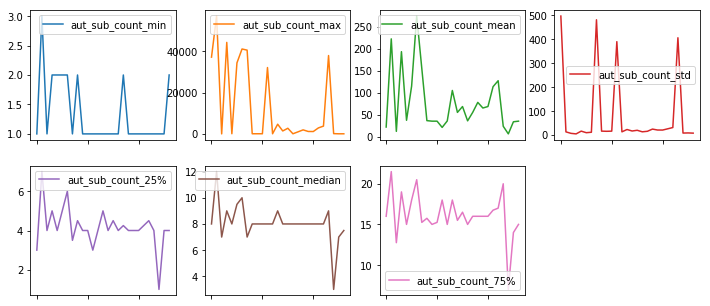

In [25]:
columns = result.columns
variables = ['aut_sub_count', 'aut_com_count','aut_com_blau','aut_com_gini','auth_com_entropy']

variable = variables[0]

#subset = result[[col for col in columns if col.startswith(variable)]]

subset = result[['aut_sub_count_min', 'aut_sub_count_max', 'aut_sub_count_mean',
       'aut_sub_count_std', 'aut_sub_count_25%', 'aut_sub_count_median',
       'aut_sub_count_75%']]
subset = subset.drop('2016-02', axis=0) # problem in 2016-02 dataset
subset.plot(subplots=True, layout=(3,4), figsize=(12,9));

In [24]:
subset.drop('2016-02', axis=0)

,aut_sub_count_min,aut_sub_count_max,aut_sub_count_mean,aut_sub_count_std,aut_sub_count_25%,aut_sub_count_median,aut_sub_count_75%
2015-11,1.0,37056.0,21.598440,496.955978,3.00,8.0,16.00
2015-12,3.0,56882.0,222.702875,12.833874,7.00,12.0,21.50
2016-01,1.0,28.0,11.743932,6.649979,4.00,7.0,12.75
2016-03,2.0,44181.0,193.461036,4.437060,5.00,9.0,19.00
2016-04,2.0,102.0,37.000000,15.981939,4.00,8.0,15.00
2016-05,2.0,34293.0,115.000000,9.416298,5.00,9.5,18.00
2016-06,2.0,40998.0,274.690909,11.323525,6.00,10.0,20.50
2016-07,1.0,40442.0,155.248883,481.378390,3.50,7.0,15.25
2016-08,2.0,93.0,36.215385,15.984355,4.50,8.0,15.75
2016-09,1.0,93.0,35.000000,15.269708,4.00,8.0,15.00


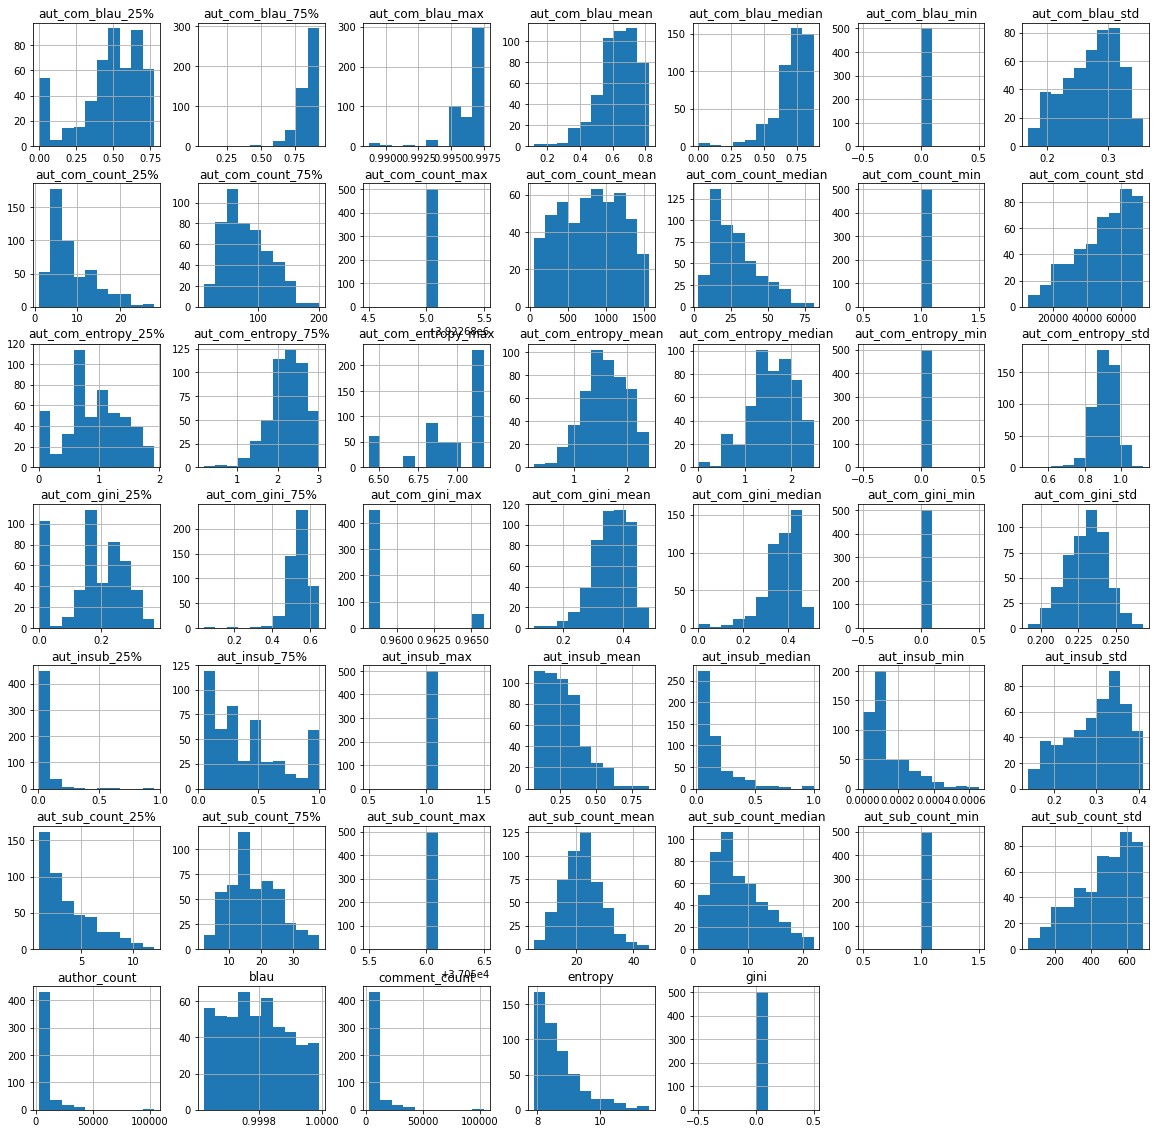

In [34]:
for date in data.keys():
    print(date)
    month = d.loc[date]
    month.hist(layout=(7,6),figsize=(20,20))
    plt.title(f"""{date} histograms""")
    plt.savefig(figurePath(f"""{date}/author-histograms.png"""));

## 1.2 Author Insubreddit Ratio

In [172]:
v = 'aut_insub_median'
t = d[v].unstack()
t.index = pd.to_datetime(t.index)

r = t.rank(axis=1, pct=True)

In [173]:
subs = ['The_Donald', 'Libertarian','Conservative',
        'politics', 'changemyview',
        'socialism','SandersForPresident','LateStageCapitalism']

st = t[subs]
sr=  r[subs]

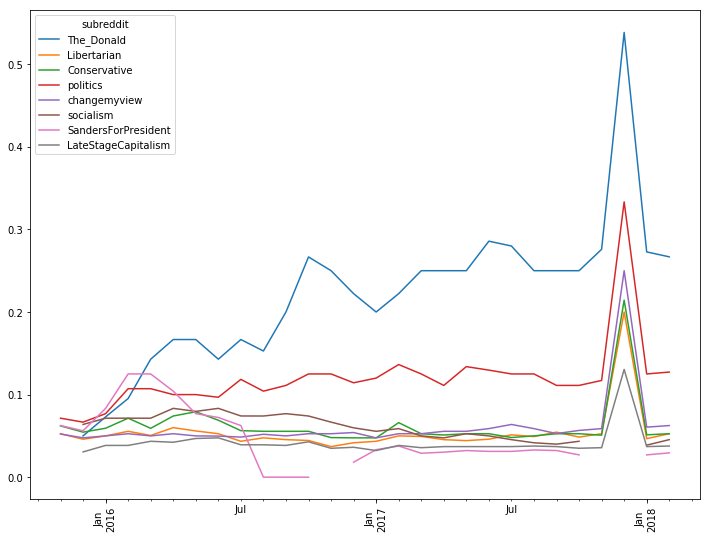

In [186]:
%matplotlib inline

st.plot(figsize=figsize)
plt.xticks(rotation=90);

All subreddits has a big peak in December 2017 - why was this?. Except Sanders which was temporarily dead

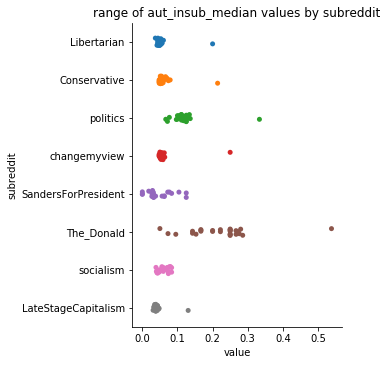

In [181]:
import seaborn as sns

long = st.stack().reset_index()
long.columns = ['date','subreddit','value']
sns.catplot(x='value',y='subreddit', data=long)
plt.title(f"""range of {v} values by subreddit""");

In [182]:
pd.options.display.float_format = '{:,.3f}'.format

summary = st.describe()
summary

subreddit,The_Donald,Libertarian,Conservative,politics,changemyview,socialism,SandersForPresident,LateStageCapitalism
count,27.000,28.000,28.000,28.000,28.000,25.000,25.000,27.000
mean,0.220,0.054,0.062,0.120,0.061,0.061,0.046,0.042
std,0.092,0.029,0.031,0.045,0.037,0.015,0.035,0.018
min,0.050,0.037,0.048,0.067,0.048,0.039,0.000,0.031
25%,0.167,0.045,0.051,0.106,0.050,0.048,0.029,0.037
50%,0.250,0.049,0.054,0.116,0.053,0.060,0.032,0.038
75%,0.258,0.053,0.060,0.125,0.057,0.074,0.062,0.039
max,0.538,0.200,0.214,0.333,0.250,0.083,0.125,0.130


TD has the greatest variation in **{{v}}** values. The mean is {{summary['The_Donald']['mean']}} and the std is {{summary['The_Donald']['std']}}

Sanders for President also has come variation in {{v}}.

The rest of the subreddits shown have stable values for {{v}}, with the except of one month (2017-12?) that is much higher than average for all.

## Rolling Window

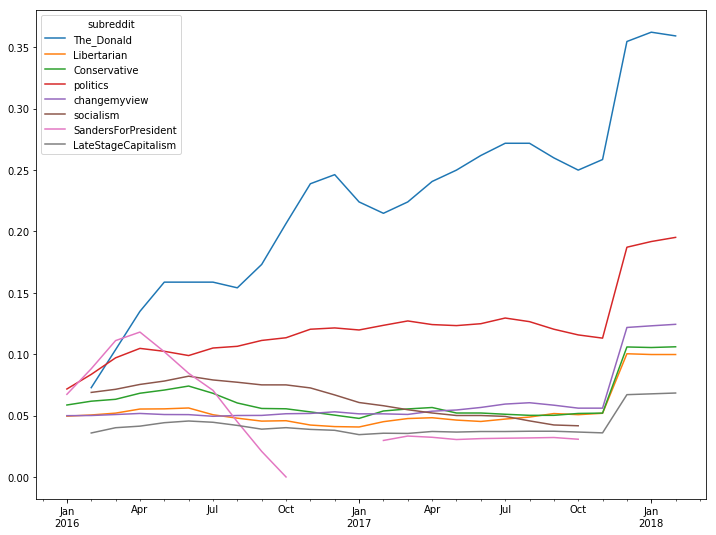

In [183]:
rolling = st.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.plot(figsize=figsize);

This plot shows the [rolling mean of 3-month windows](https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/). Most subreddits are roughly stable until 2017-12.

The key findings are:
- In The_Donald {{v}} has increased over time, with some fluctucations
- In politics there has been a slight increase over time
- In socialism there has been a decrease


Questions:
- Why did all subreddits have a steep increase in 2017-12 (the last timepoint shown here)
- Check SandersForPresident really went totally quiet for a few months
- Check that SandersForPresident peak and trailling over aligns with loss of DNC nomination

## Decomposing Seasonality

/anaconda3/envs/part1/lib/python3.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


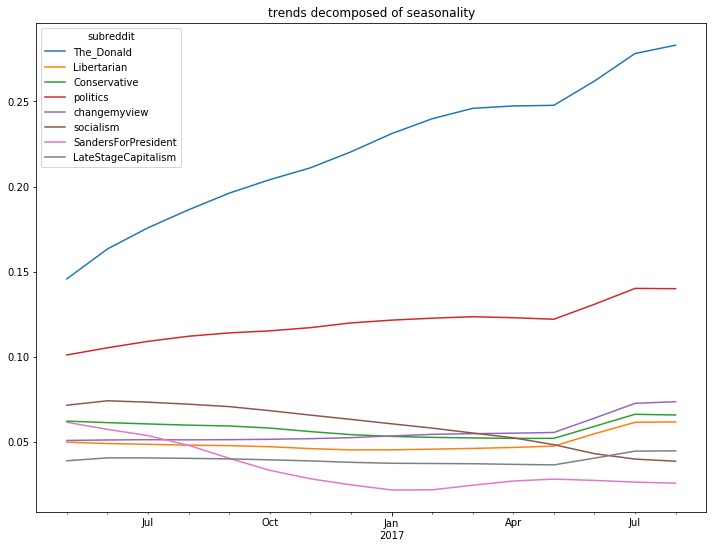

In [184]:
d = st.fillna(0)
d.index = pd.to_datetime(d.index)

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(d, model='additive')

result.trend.plot(title = 'trends decomposed of seasonality', figsize=figsize);

I also tried decomposing the time series into [trend and seasonality](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/). We can see the same trends from the rolling window for clearly. Most subreddits have an uptick in the final month. 

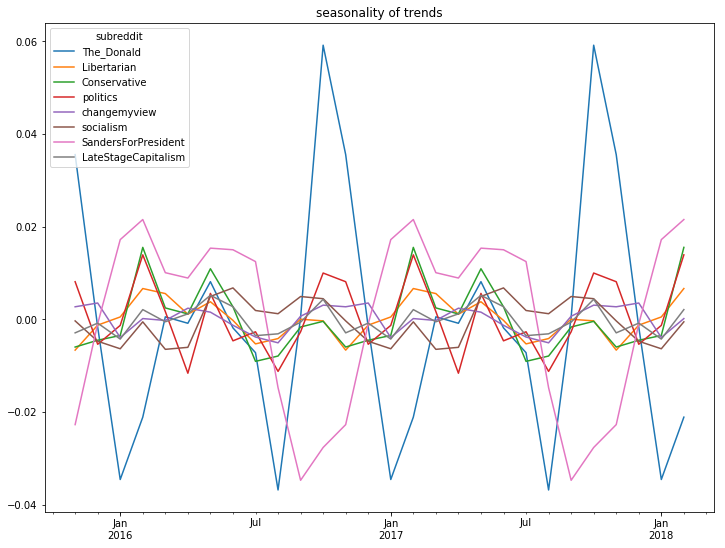

In [185]:
result.seasonal.plot(title='seasonality of trends', figsize=figsize);

The seasonal plot shows that The_Donald has peaks in {{v}} in October and nadirs in January and August. January and August may correlate with holiday/vacation periods. While October alighns with the run up to elections in the US in November

In [63]:
outliers = result.resid.stack().sort_values()

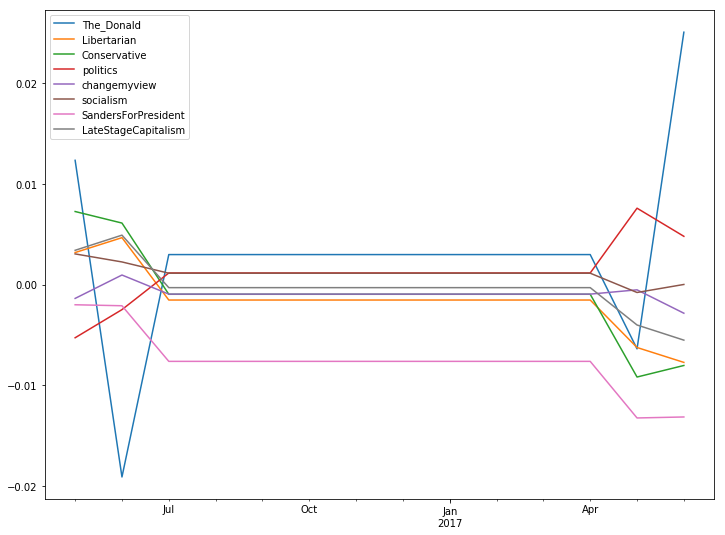

In [100]:
result.resid.plot(figsize=figsize);

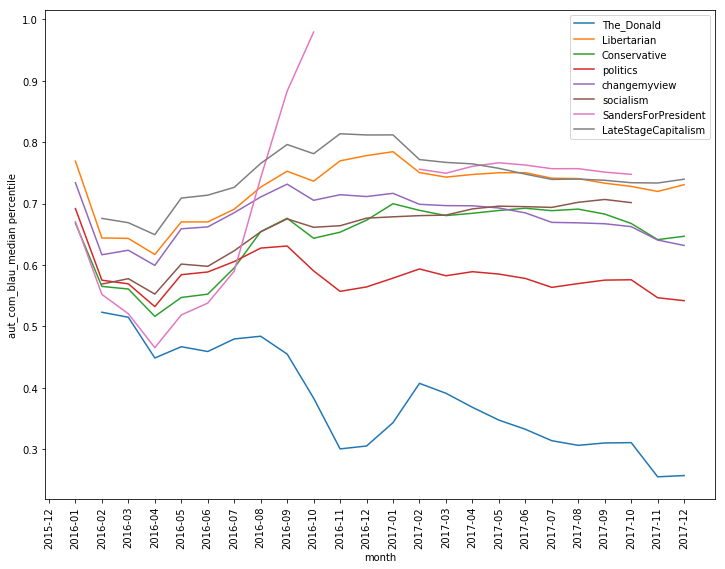

In [126]:
v = "aut_com_blau_median"
t = timeline(data, v)

plot(t, v)

In [124]:
data['2017-01'].columns

Index(['aut_sub_count_min', 'aut_sub_count_max', 'aut_sub_count_mean',
       'aut_sub_count_std', 'aut_sub_count_25%', 'aut_sub_count_median',
       'aut_sub_count_75%', 'aut_com_count_min', 'aut_com_count_max',
       'aut_com_count_mean', 'aut_com_count_std', 'aut_com_count_25%',
       'aut_com_count_median', 'aut_com_count_75%', 'aut_com_entropy_min',
       'aut_com_entropy_max', 'aut_com_entropy_mean', 'aut_com_entropy_std',
       'aut_com_entropy_25%', 'aut_com_entropy_median', 'aut_com_entropy_75%',
       'aut_com_gini_min', 'aut_com_gini_max', 'aut_com_gini_mean',
       'aut_com_gini_std', 'aut_com_gini_25%', 'aut_com_gini_median',
       'aut_com_gini_75%', 'aut_com_blau_min', 'aut_com_blau_max',
       'aut_com_blau_mean', 'aut_com_blau_std', 'aut_com_blau_25%',
       'aut_com_blau_median', 'aut_com_blau_75%', 'aut_insub_min',
       'aut_insub_max', 'aut_insub_mean', 'aut_insub_std', 'aut_insub_25%',
       'aut_insub_median', 'aut_insub_75%', 'author_count', 'comment

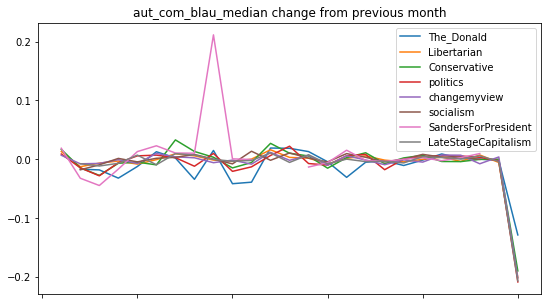

In [132]:
figsize = (9,5)

subset = getSubset(t).T
subset.diff().plot(title = f"""{v} change from previous month""", figsize=figsize);

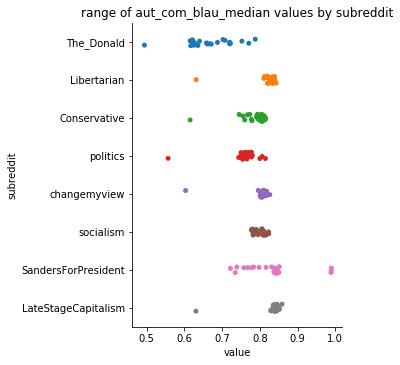

In [133]:
long = subset.T.stack().reset_index()
long.columns = ['subreddit','date','value']
sns.catplot(x='value',y='subreddit', data=long)
plt.title(f"""range of {v} values by subreddit""");

In [212]:
d.head()

aut_sub_count_min  aut_sub_count_max  aut_sub_count_mean  \
        subreddit                                                             
2015-11 AskReddit                  1              37056               8.596   
        funny                      1              37056              12.827   
        pics                       1              37056              13.611   
        videos                     1              37056              13.814   
        worldnews                  1              37056              14.579   

                   aut_sub_count_std  aut_sub_count_25%  aut_sub_count_median  \
        subreddit                                                               
2015-11 AskReddit             51.116              2.000                 5.000   
        funny                 82.876              4.000                 9.000   
        pics                  85.031              5.000                10.000   
        videos                92.390              5.000                10.000   
        worldnews             97.295              5.000                11.000   

                   aut_sub_count_75%  aut_com_count_min  aut_com_count_max  \
        subreddit                                                            
2015-11 AskReddit             11.000                  1            3922685   
        funny                 17.000                  1            3922685   
        pics                  18.000                  1            3922685   
        videos                18.000                  1            3922685   
        worldnews             19.000                  1            3922685   

                   aut_com_count_mean  ...   aut_insub_mean  aut_insub_std  \
        subreddit                      ...                                   
2015-11 AskReddit              50.198  ...            0.360          0.337   
        funny                  84.336  ...            0.189          0.264   
        pics                   89.596  ...            0.170          0.248   
        videos                 95.478  ...            0.180          0.257   
        worldnews             110.914  ...            0.168          0.243   

                   aut_insub_25%  aut_insub_median  aut_insub_75%  \
        subreddit                                                   
2015-11 AskReddit          0.086             0.231          0.500   
        funny              0.032             0.077          0.200   
        pics               0.029             0.071          0.182   
        videos             0.029             0.071          0.200   
        worldnews          0.027             0.069          0.188   

                   author_count  comment_count  entropy  gini  blau  
        subreddit                                                    
2015-11 AskReddit        103892         103892   11.551 0.000 1.000  
        funny            102660         102660   11.539 0.000 1.000  
        pics             101799         101799   11.531 0.000 1.000  
        videos           100156         100156   11.514 0.000 1.000  
        worldnews         86642          86642   11.370 0.000 1.000  

[5 rows x 47 columns]

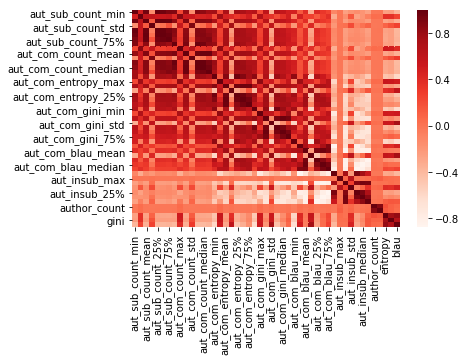

In [219]:
c = d.corr()

sns.heatmap(c, cmap="Reds")

In [222]:
b = d['blau'].reset_index().groupby('subreddit')['blau'].describe()

KeyboardInterrupt: 